In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')

frames = [df1, df2]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
#Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
print(df)

        Ticker  DTYYYYMMDD    Open    High     Low   Close  Volume
0          AAV    20210730  12.400  12.400  12.100  12.400  166400
1          ABT    20210730  26.000  27.200  26.000  27.100    1207
2          ACM    20210730   2.300   2.400   2.300   2.400  592463
3          ADC    20210730  21.500  21.500  21.500  21.500       0
4          ALT    20210730  12.700  12.700  12.700  12.700       0
...        ...         ...     ...     ...     ...     ...     ...
1436015    VSC    20120103   6.807   6.807   6.572   6.572   15658
1436016    VSH    20120103   5.052   5.113   5.052   5.052  211961
1436017    VSI    20120103   1.844   1.844   1.684   1.684    6258
1436018    VTB    20120103   2.538   2.538   2.538   2.538      26
1436019    VTO    20120103   1.747   1.747   1.707   1.707   36310

[1436020 rows x 7 columns]


In [5]:
#Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified)
df_modified["DTYYYYMMDD"] = pd.to_datetime(df_modified["DTYYYYMMDD"], format='%Y%m%d')
print(df_modified[:].dtypes)

        Ticker  DTYYYYMMDD    Open    High     Low   Close  Volume
0          AAV    20210730  12.400  12.400  12.100  12.400  166400
1          ABT    20210730  26.000  27.200  26.000  27.100    1207
2          ACM    20210730   2.300   2.400   2.300   2.400  592463
3          ADC    20210730  21.500  21.500  21.500  21.500       0
4          ALT    20210730  12.700  12.700  12.700  12.700       0
...        ...         ...     ...     ...     ...     ...     ...
1436015    VSC    20120103   6.807   6.807   6.572   6.572   15658
1436016    VSH    20120103   5.052   5.113   5.052   5.052  211961
1436017    VSI    20120103   1.844   1.844   1.684   1.684    6258
1436018    VTB    20120103   2.538   2.538   2.538   2.538      26
1436019    VTO    20120103   1.747   1.747   1.707   1.707   36310

[1436020 rows x 7 columns]
Ticker                object
DTYYYYMMDD    datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                fl

In [6]:
#Pivot the table
pivot = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(pivot)
#print(pivot['Ticker'].dtypes)

Ticker         AAA     AAM   AAT   AAV    ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                      
2012-01-03   2.950   8.336   NaN   NaN    NaN  13.371   5.760   5.259   5.411   
2012-01-04   2.976   8.487   NaN   NaN    NaN  13.409   5.760   5.289   5.349   
2012-01-05   2.950   8.374   NaN   NaN    NaN  13.669   5.939   5.053   5.349   
2012-01-06   2.925   8.374   NaN   NaN    NaN  13.036   5.819   5.289   5.349   
2012-01-09   2.950   8.374   NaN   NaN    NaN  13.036   5.790   5.289   5.349   
...            ...     ...   ...   ...    ...     ...     ...     ...     ...   
2021-07-26  15.450  10.800  17.5  12.4  18.55  27.600  32.700  14.000  11.400   
2021-07-27  16.000  10.500  17.7  12.4  18.90  27.600  33.150  13.700  11.600   
2021-07-28  16.300  10.100  17.6  12.4  19.35  27.000  33.150  13.700  11.600   
2021-07-29  16.150  10.800  17.6  12.4  19.95  27.000  34.150  13.700  11.500   
2021-07-30  16.150  10.900  

In [7]:
%%HTML
<h1>Filter Data</h1>

In [8]:
%%HTML
<h3>Here we only consider data between 01/04/2018 and 30/06/2018 (a total of 62 days)</h3>

In [9]:
data_list = []
import datetime
from datetime import timedelta
start_date = datetime.date(2015, 1, 1)
end_date = start_date

while end_date.year != 2019:
    end_date = start_date + datetime.timedelta(days=90)
    data_q = pivot.loc[start_date:end_date]
    data_list.append(data_q)
    start_date = end_date

print(data_list)

[Ticker        AAA    AAM  AAT  AAV  ABS     ABT    ACB     ACC    ACL  ACM  \
DTYYYYMMDD                                                                   
2015-01-05  6.223  7.485  NaN  NaN  NaN  31.261  4.991  14.233  4.147  NaN   
2015-01-06  6.314  7.433  NaN  NaN  NaN  31.261  5.056  13.758  4.147  NaN   
2015-01-07  6.539  7.485  NaN  NaN  NaN  30.968  5.121  13.370  4.328  NaN   
2015-01-08  6.404  7.537  NaN  NaN  NaN  32.137  5.154  13.370  4.328  NaN   
2015-01-09  6.269  7.069  NaN  NaN  NaN  33.890  5.187  14.060  4.292  NaN   
2015-01-12  6.088  7.485  NaN  NaN  NaN  32.721  5.252  14.060  4.256  NaN   
2015-01-13  6.223  7.069  NaN  NaN  NaN  33.306  5.382  14.060  4.328  NaN   
2015-01-14  6.223  7.069  NaN  NaN  NaN  34.474  5.285  14.060  4.220  NaN   
2015-01-15  6.178  7.225  NaN  NaN  NaN  34.474  5.187  14.060  4.147  NaN   
2015-01-16  6.178  7.381  NaN  NaN  NaN  34.474  5.187  14.060  4.183  NaN   
2015-01-19  6.133  7.225  NaN  NaN  NaN  34.474  5.252  14.060 

[58 rows x 750 columns]]


In [10]:
# data_q1 = pivot.loc['2018-01-01':'2018-03-31']
# data_q2 = pivot.loc['2018-04-01':'2018-06-30']
# data_list = [data_q1, data_q2]

In [11]:
%%HTML
<h1>Clean Data</h1>

In [12]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [13]:
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from statsmodels.tsa.stattools import coint

pair_dict = {}

for data in data_list:
    # We shall remove all the columns with more than 20% of missing data
    missing_percentage = data.isnull().mean().sort_values(ascending=False)
    dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
    data.drop(labels=dropped_list, axis=1, inplace=True)
    
    #Fill the remaining missing values with already available values
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
    
    import numpy as np

    #Calculate returns and create a data frame
    returns = data.pct_change()

    returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    returns.dropna(inplace=True)

    
    data1 = returns
    
    returns = returns.reset_index()
    returns = returns.drop(['DTYYYYMMDD'], axis=1)
    
    #Calculate returns and create a data frame
    returns1 = data.pct_change().mean()*len(returns)
    returns1 = pd.DataFrame(returns1)
    returns1.columns = ['mean returns']

    #Calculate the volatility
    returns1['volatility'] = data.pct_change().std()*np.sqrt(len(returns))
    
    #Adding the industry
    industry = pd.read_excel('./data/industry.xlsx', index_col=0)
    industry1 = pd.get_dummies(industry, columns = ['Value'])

    returns_trans = returns.transpose()
    #X = np.hstack((returns_trans, returns1, industry1))
    X = np.hstack((returns_trans, returns1))

    X = preprocessing.StandardScaler().fit_transform(X)

    clf = DBSCAN(eps=5.3, min_samples=3)

    clf.fit(X)
    labels = clf.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    clustered = clf.labels_
    
    # the initial dimensionality of the search was
    ticker_count = len(returns.columns)
    
    clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
    clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
    clustered_series = clustered_series[clustered_series != -1]
    
    CLUSTER_SIZE_LIMIT = 9999
    counts = clustered_series.value_counts()
    ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]

    cluster_dict = {}
    for i, which_clust in enumerate(ticker_count_reduced.index):
        tickers = clustered_series[clustered_series == which_clust].index
        score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(returns[tickers])
        cluster_dict[which_clust] = {}
        cluster_dict[which_clust]['score_matrix'] = score_matrix
        cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
        cluster_dict[which_clust]['pairs'] = pairs
    
    pairs = []
    for clust in cluster_dict.keys():
        pairs.extend(cluster_dict[clust]['pairs'])
            
    for pair in pairs:
        if pair in pair_dict:
            pair_dict[pair] = pair_dict[pair] + 1
        else:
            pair_dict[pair] = 1

print(pair_dict)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\2873668871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(labels=dropped_list, axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\2873668871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(labels=dropped_list, axis=1, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\2873668871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

{('AAA', 'ABT'): 3, ('AAA', 'ACB'): 9, ('AAA', 'AGR'): 4, ('AAA', 'ANV'): 3, ('AAA', 'APC'): 4, ('AAA', 'API'): 1, ('AAA', 'APS'): 1, ('AAA', 'ASM'): 6, ('AAA', 'ASP'): 4, ('AAA', 'BCE'): 8, ('AAA', 'BDB'): 5, ('AAA', 'BII'): 1, ('AAA', 'BLF'): 1, ('AAA', 'BMC'): 4, ('AAA', 'BMI'): 5, ('AAA', 'BMP'): 5, ('AAA', 'BPC'): 4, ('AAA', 'BRC'): 4, ('AAA', 'BSI'): 5, ('AAA', 'BTP'): 7, ('AAA', 'BVH'): 6, ('AAA', 'BVS'): 8, ('AAA', 'C32'): 8, ('AAA', 'CAP'): 5, ('AAA', 'CAV'): 7, ('AAA', 'CDC'): 3, ('AAA', 'CII'): 6, ('AAA', 'CMC'): 5, ('AAA', 'CMV'): 3, ('AAA', 'CNG'): 7, ('AAA', 'CSM'): 9, ('AAA', 'CTS'): 6, ('AAA', 'DAE'): 5, ('AAA', 'DCL'): 2, ('AAA', 'DHA'): 9, ('AAA', 'DHC'): 8, ('AAA', 'DHG'): 8, ('AAA', 'DHM'): 1, ('AAA', 'DHP'): 5, ('AAA', 'DHT'): 5, ('AAA', 'DIG'): 5, ('AAA', 'DLG'): 3, ('AAA', 'DMC'): 5, ('AAA', 'DPM'): 8, ('AAA', 'DPR'): 8, ('AAA', 'DRC'): 7, ('AAA', 'DRL'): 5, ('AAA', 'DSN'): 9, ('AAA', 'DVP'): 8, ('AAA', 'DXP'): 3, ('AAA', 'E1VFVN30'): 9, ('AAA', 'EBS'): 7, ('AAA'

In [15]:
for pair in pair_dict:
    if pair_dict[pair] > 8:
        print(pair, pair_dict[pair])

('AAA', 'ACB') 9
('AAA', 'CSM') 9
('AAA', 'DHA') 9
('AAA', 'DSN') 9
('AAA', 'E1VFVN30') 9
('AAA', 'FPT') 9
('AAA', 'GMD') 9
('AAA', 'GSP') 9
('AAA', 'IMP') 9
('AAA', 'MBB') 9
('AAA', 'PET') 9
('AAA', 'PGC') 9
('AAA', 'QST') 9
('AAA', 'SAM') 9
('AAA', 'SBA') 9
('AAA', 'SJD') 9
('AAA', 'VIC') 9
('AAA', 'VIP') 9
('AAA', 'VNM') 9
('AAA', 'VSH') 9
('AAA', 'VTO') 9


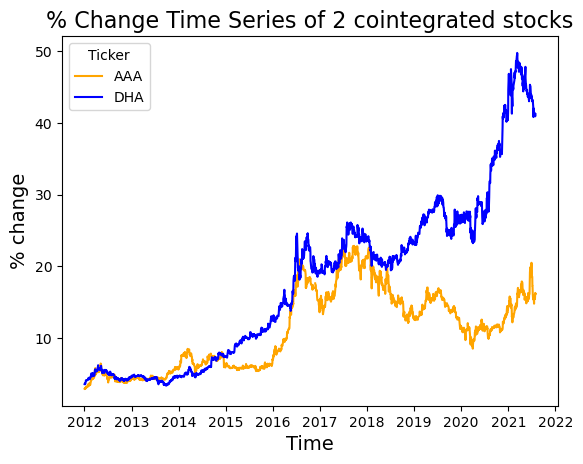

In [22]:
import matplotlib.pyplot as plt
#plot each series
plt.plot(pivot['AAA'], label='AAA', color='orange')
plt.plot(pivot['DHA'], label='DHA', color='blue')
plt.legend(title='Ticker')

#add axes labels and a title
plt.ylabel('% change', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('% Change Time Series of 2 cointegrated stocks', fontsize=16)

#display plot
plt.show()

In [23]:
#pivot.to_excel("./data/industry1.xlsx") 